# Data Exploration

Hey! During this first step, please, take a look at the data set and just explore it, find the types of each column and try to find interesting things. Don't worry about data cleaning. Just exploration for now.  
You can answer the following questions:
- How many columns there are
- The type of each column
- The different values that a column can take
- Which do you think are the most important columns? If we are looking at the overall score.

Go wild! (Remember, so far, only exploration).


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# The first thing was to check the data docs at https://www.datos.gov.co/Educaci-n/Saber-11-2019-2/ynam-yc42 
df = pd.read_csv('Saber_11__2019-2.csv')
df.head()

C:\Users\jagiraldo\AppData\Local\Temp\ipykernel_16160\2972959786.py:2: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Saber_11__2019-2.csv')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67,A1,208,25,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88,A2,299,83,59.767864431576,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89,A2,299,84,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63,A1,288,78,52.9109464277177,3.0,3.0,PUBLICAR,NO


## Content exploration

In [3]:
print(f"This dataframe has {df.columns.size} columns")

This dataframe has 82 columns


In [4]:
t = df.dtypes # Indentify columns with mixed types or strings
obj = t[t=="object"]
print(obj.index)

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE',
       'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_NOMBRE_ESTAB

In [5]:
t = df.dtypes # Identify columns with numerical data types
num = t[t!="object"]
print(num.index)

Index(['PERIODO', 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO',
       'COLE_COD_DANE_SEDE', 'COLE_COD_MCPIO_UBICACION',
       'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_COD_DEPTO_PRESENTACION', 'PUNT_LECTURA_CRITICA',
       'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',
       'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES',
       'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS',
       'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES',
       'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO'],
      dtype='object')


## Data cleaning

In [6]:
is_na = df.isna().sum(axis=0) # Check which attributes have missing values
is_na = is_na[is_na != 0]
print(is_na.index)

Index(['ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CARACTER', 'PUNT_INGLES',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
       'ESTU_NSE_ESTABLECIMIENTO'],
      dtype='object')


In [7]:
is_na = is_na.sort_values(ascending=False)
print(is_na[is_na>0].head())

ESTU_DEDICACIONINTERNET          30298
FAMI_COMECEREALFRUTOSLEGUMBRE    22332
FAMI_COMELECHEDERIVADOS          22305
FAMI_TIENESERVICIOTV             22280
FAMI_EDUCACIONMADRE              20959
dtype: int64


In [8]:
df = df.drop(is_na[is_na>1000].index, axis=1) # Drop columns with missing data
a = df.isna().sum(axis=1).sort_values(ascending=False) # Check which rows have missing features
print(a[a>0].size)

1149


In [9]:
df = df.drop(a[a>0].index) # Drop rows
df = df.drop(["ESTU_TIPODOCUMENTO", "ESTU_NACIONALIDAD", "PERIODO", "ESTU_CONSECUTIVO", "ESTU_ESTUDIANTE", "ESTU_COD_RESIDE_DEPTO", "ESTU_COD_RESIDE_MCPIO", "COLE_CODIGO_ICFES", "COLE_COD_DANE_ESTABLECIMIENTO", "COLE_COD_DANE_SEDE", "COLE_COD_MCPIO_UBICACION", "COLE_COD_DEPTO_UBICACION", "ESTU_COD_MCPIO_PRESENTACION", "ESTU_COD_DEPTO_PRESENTACION", "ESTU_ESTADOINVESTIGACION"], axis=1)

In [10]:
df["ESTU_FECHANACIMIENTO"] = df["ESTU_FECHANACIMIENTO"].map(lambda x: (x.split(" ")[0]).split("/")[2])
df["ESTU_FECHANACIMIENTO"] = df["ESTU_FECHANACIMIENTO"].astype(int)

In [62]:
d = df["ESTU_FECHANACIMIENTO"].unique()
d.sort()
print(d)

[   1    2 1900 1910 1936 1940 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


## Exploratory analysis

In [11]:
df["PUNT_GLOBAL"].describe()

count    545063.000000
mean        246.237967
std          51.369556
min           0.000000
25%         207.000000
50%         243.000000
75%         282.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64

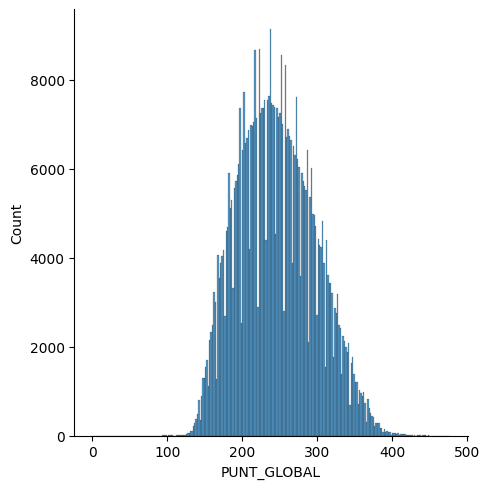

In [12]:
sns.displot(df, x="PUNT_GLOBAL")

In [43]:
g = df.groupby("ESTU_DEPTO_RESIDE")["PUNT_GLOBAL"].mean().sort_values(ascending=False)
print(g[:15])

ESTU_DEPTO_RESIDE
BOGOTÁ             266.484754
SANTANDER          264.133357
BOYACA             261.586032
NORTE SANTANDER    255.336570
CUNDINAMARCA       253.181715
QUINDIO            251.896315
RISARALDA          250.416082
HUILA              250.055421
META               247.935406
CASANARE           246.737062
CALDAS             246.203492
NARIÑO             244.371606
VALLE              242.641871
ANTIOQUIA          241.991230
ATLANTICO          241.618542
Name: PUNT_GLOBAL, dtype: float64


In [44]:
g = df.groupby(["ESTU_DEPTO_RESIDE","ESTU_MCPIO_RESIDE"])["PUNT_GLOBAL"].mean().sort_values(ascending=False)
print(g[:15])

ESTU_DEPTO_RESIDE  ESTU_MCPIO_RESIDE    
SANTANDER          CALIFORNIA               288.875000
                   PALMAR                   288.300000
                   SAN JOSÉ DE MIRANDA      287.083333
BOYACA             PAIPA                    284.995316
SANTANDER          JORDÁN                   284.750000
                   CONTRATACIÓN             284.627451
NARIÑO             GUALMATÁN                281.661972
BOYACA             SANTA ROSA DE VITERBO    281.438017
NORTE SANTANDER    PAMPLONA                 281.019449
BOYACA             DUITAMA                  280.717213
SANTANDER          BUCARAMANGA              279.775787
ANTIOQUIA          ENVIGADO                 278.794182
BOYACA             IZA                      278.363636
SANTANDER          SAN MIGUEL               277.472222
BOYACA             SOGAMOSO                 277.204498
Name: PUNT_GLOBAL, dtype: float64


### Reading comprehension

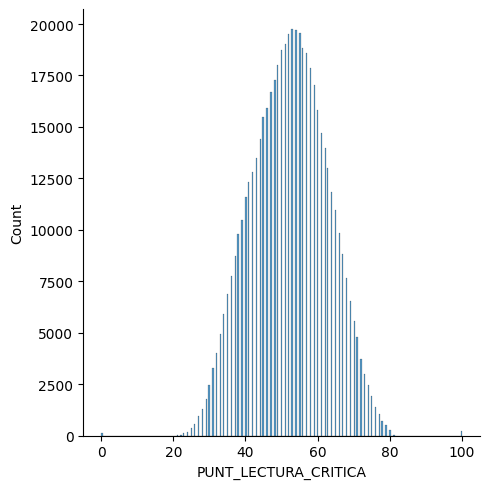

In [42]:
sns.displot(df, x="PUNT_LECTURA_CRITICA")

In [54]:
g = df.groupby(["ESTU_DEDICACIONLECTURADIARIA"])["PUNT_GLOBAL"].mean().sort_values()
print(g)

ESTU_DEDICACIONLECTURADIARIA
-                             222.100870
No leo por entretenimiento    237.300204
30 minutos o menos            241.608286
Entre 30 y 60 minutos         256.425837
Entre 1 y 2 horas             258.046116
Más de 2 horas                266.297249
Name: PUNT_GLOBAL, dtype: float64


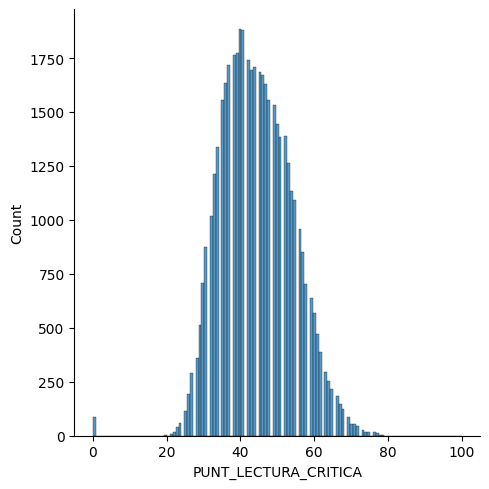

In [53]:
sns.displot(df, x=df["PUNT_LECTURA_CRITICA"].where(df["ESTU_FECHANACIMIENTO"]<2000)) # Exploration by age

In [26]:
g = df.groupby(["PUNT_LECTURA_CRITICA", "ESTU_DEDICACIONLECTURADIARIA"])["PUNT_GLOBAL"].agg(["mean", "size"]).sort_values(by="mean",ascending=False)
print(g[:20])

                                                         mean  size
PUNT_LECTURA_CRITICA ESTU_DEDICACIONLECTURADIARIA                  
100                  30 minutos o menos            396.980392    51
                     Entre 30 y 60 minutos         393.807692    78
                     Entre 1 y 2 horas             393.229167    48
                     Más de 2 horas                393.050000    20
                     No leo por entretenimiento    391.312500    16
81                   No leo por entretenimiento    390.250000     4
82                   30 minutos o menos            383.000000     1
                     Entre 30 y 60 minutos         382.500000     2
                     Entre 1 y 2 horas             382.000000     1
81                   30 minutos o menos            377.307692    13
100                  -                             375.000000     8
80                   No leo por entretenimiento    374.920000    25
                     Más de 2 horas             

In [57]:
g = df.groupby(["ESTU_FECHANACIMIENTO"])["PUNT_GLOBAL"].mean().sort_values(ascending=False)
print(g[:15])

ESTU_FECHANACIMIENTO
2004    265.352462
2       265.333333
2003    264.301074
2013    256.666667
2002    256.569053
2005    248.978261
2006    248.177778
2010    246.441441
1900    244.586263
2007    244.586207
2009    242.763158
2012    240.190476
2018    240.040000
2017    236.000000
2011    235.291667
Name: PUNT_GLOBAL, dtype: float64
